In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Load dataset
df = pd.read_csv("FinalSentiment.csv")  # Replace with actual file path

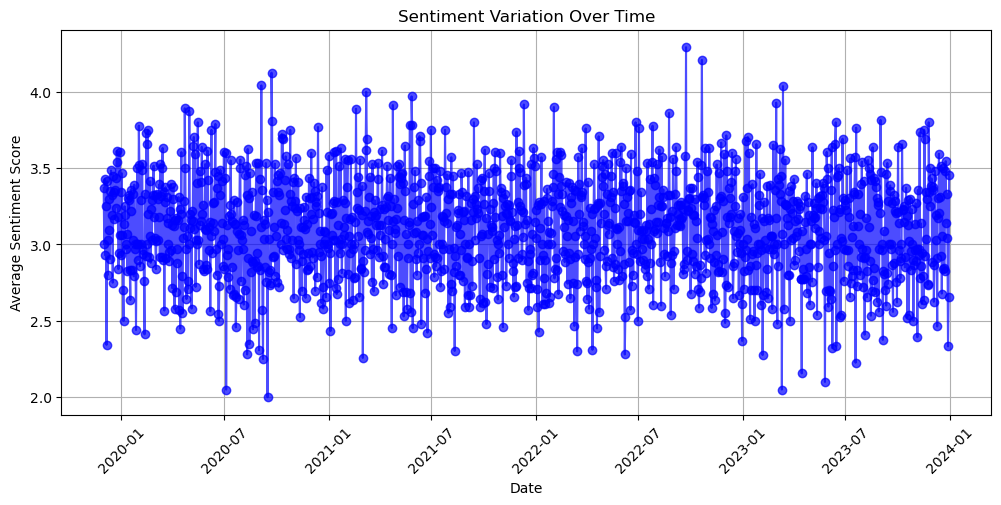

In [9]:
# Convert 'date_collected' to datetime format
df['date_collected'] = pd.to_datetime(df['date_collected'], dayfirst=True)

# Group by date and calculate average sentiment score
sentiment_over_time = df.groupby(df['date_collected'].dt.date)['encoded_status'].mean()

# Plot time series
plt.figure(figsize=(12, 5))
plt.plot(sentiment_over_time, marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Variation Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

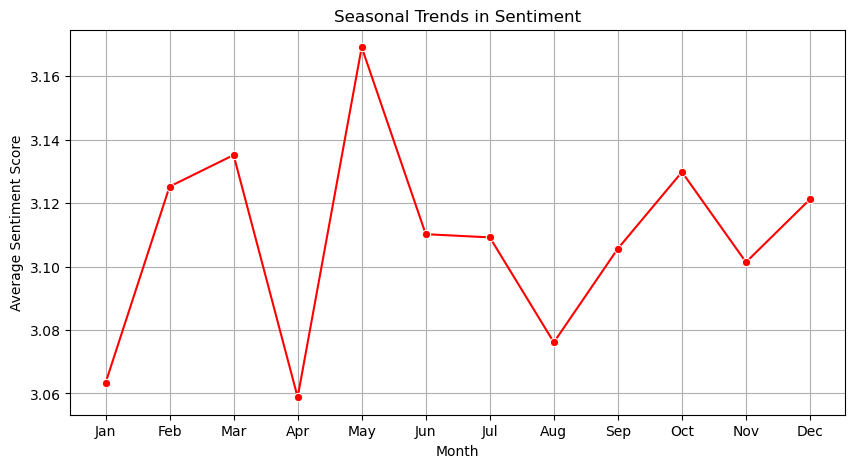

In [11]:
# Extract month
df['month'] = df['date_collected'].dt.month

# Group by month and calculate mean sentiment
seasonal_trend = df.groupby('month')['encoded_status'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=seasonal_trend.index, y=seasonal_trend.values, marker='o', color='r')
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Seasonal Trends in Sentiment")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_9692\2756639640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Holiday', 'Holiday'], y=holiday_sentiment.values, palette=["green", "red"])


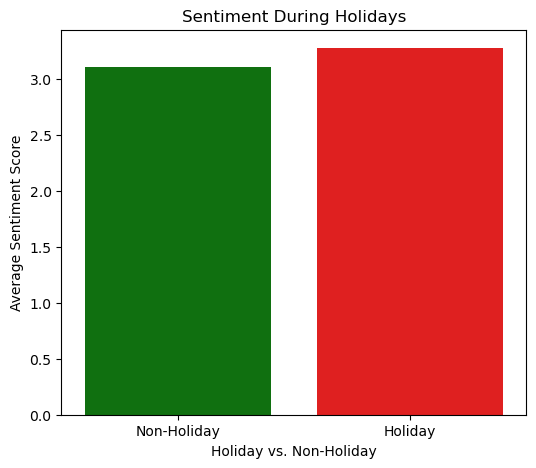

In [17]:
# List of major holidays (Add more as needed)
holidays = ['2023-12-25', '2023-01-01', '2023-11-23']  # Example dates
df['is_holiday'] = df['date_collected'].dt.date.astype(str).isin(holidays)

# Compare sentiment scores
holiday_sentiment = df.groupby('is_holiday')['encoded_status'].mean()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=['Non-Holiday', 'Holiday'], y=holiday_sentiment.values, palette=["green", "red"])
plt.xlabel("Holiday vs. Non-Holiday")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment During Holidays")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_9692\606642548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_fluctuations.index, y=sentiment_fluctuations.values, palette="coolwarm")


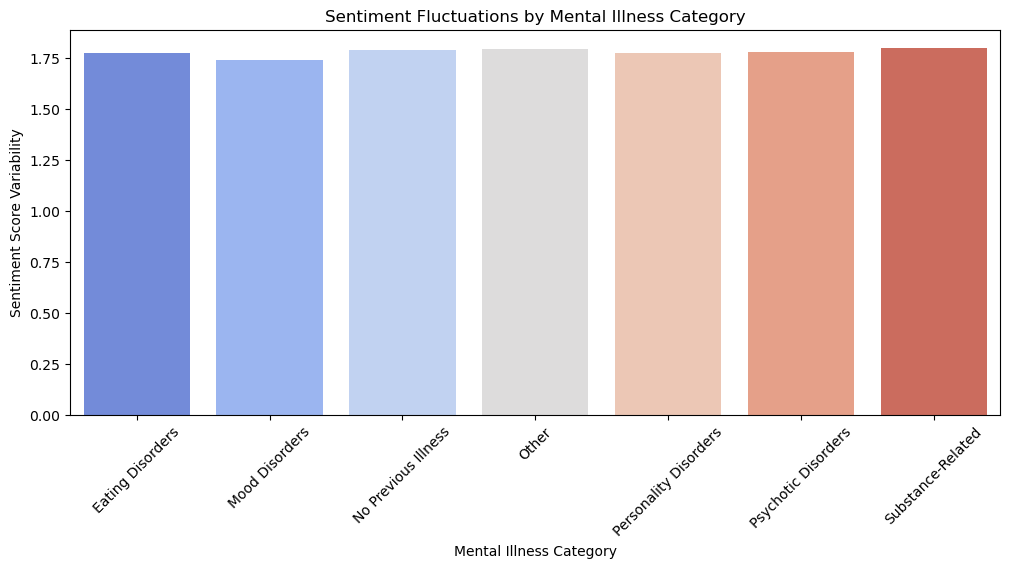

In [19]:
# Group by Mental Illness category and compute standard deviation of sentiment scores
sentiment_fluctuations = df.groupby('Mental_Illness_Category')['encoded_status'].std()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=sentiment_fluctuations.index, y=sentiment_fluctuations.values, palette="coolwarm")
plt.xlabel("Mental Illness Category")
plt.ylabel("Sentiment Score Variability")
plt.title("Sentiment Fluctuations by Mental Illness Category")
plt.xticks(rotation=45)
plt.show()

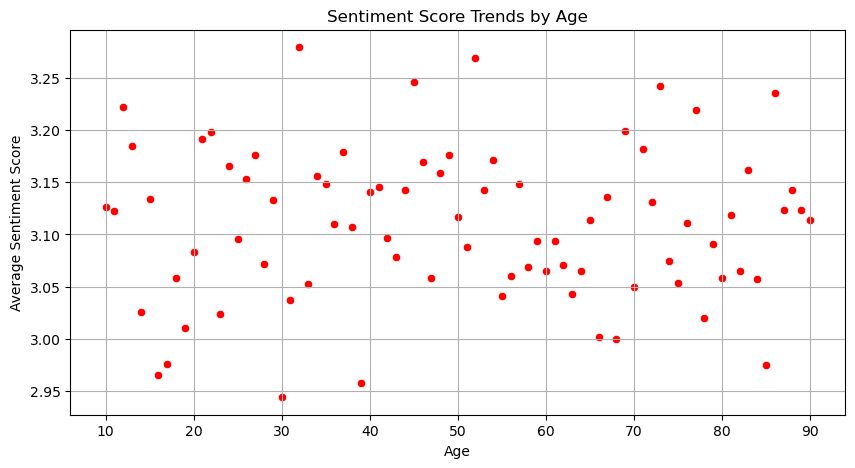

In [23]:
# Assuming 'age' column exists
age_sentiment_trend = df.groupby('age')['encoded_status'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=age_sentiment_trend.index, y=age_sentiment_trend.values, color="red")
plt.xlabel("Age")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Score Trends by Age")
plt.grid()
plt.show()